In [77]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
#ignore the warnings  
import warnings
warnings.filterwarnings("ignore")
#libraries for plotting
import matplotlib.cm as cm
import plotly.express as px

In [2]:
# Read the IPL dataset
ipl_data = pd.read_csv(r"C:\Users\Prakash Enerprener\OneDrive\Desktop\data science\Unsupervised learning\ipl project\IPL Ball-by-Ball 2008-2020.csv")

In [64]:
ipl_data

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [4]:
# Exploratory Data Analysis (EDA)
print("Data Quality Check:")
print(ipl_data.info())

Data Quality Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      

In [5]:
print("\nMissing Values Check:")
print(ipl_data.isnull().sum()/len(ipl_data*100))


Missing Values Check:
id                  0.000000
inning              0.000000
over                0.000000
ball                0.000000
batsman             0.000000
non_striker         0.000000
bowler              0.000000
batsman_runs        0.000000
extra_runs          0.000000
total_runs          0.000000
non_boundary        0.000000
is_wicket           0.000000
dismissal_kind      0.950922
player_dismissed    0.950922
fielder             0.964935
extras_type         0.947108
batting_team        0.000000
bowling_team        0.000987
dtype: float64


In [6]:
import sweetviz as sv

                                             |                                             | [  0%]   00:00 ->…


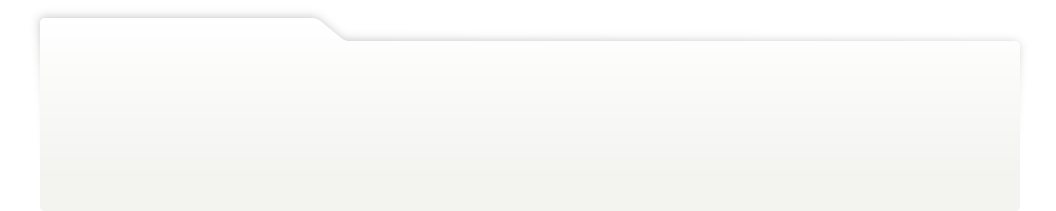
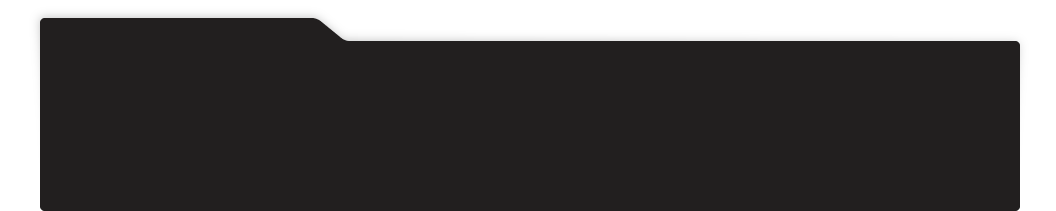
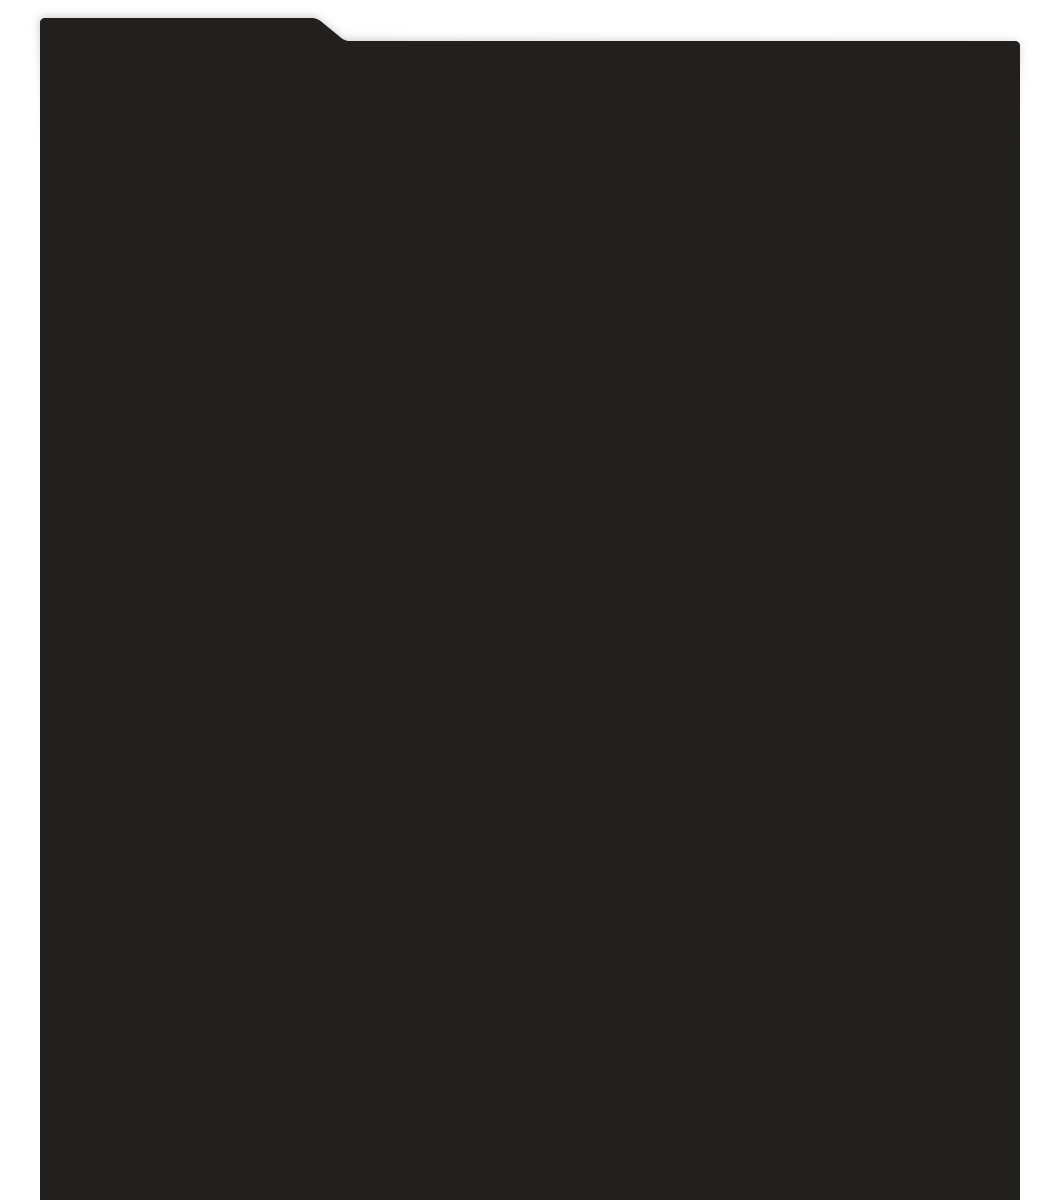
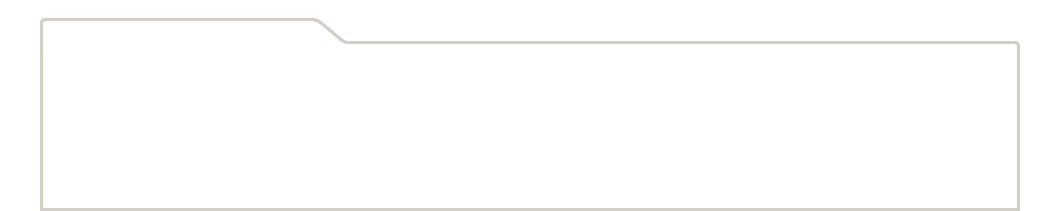
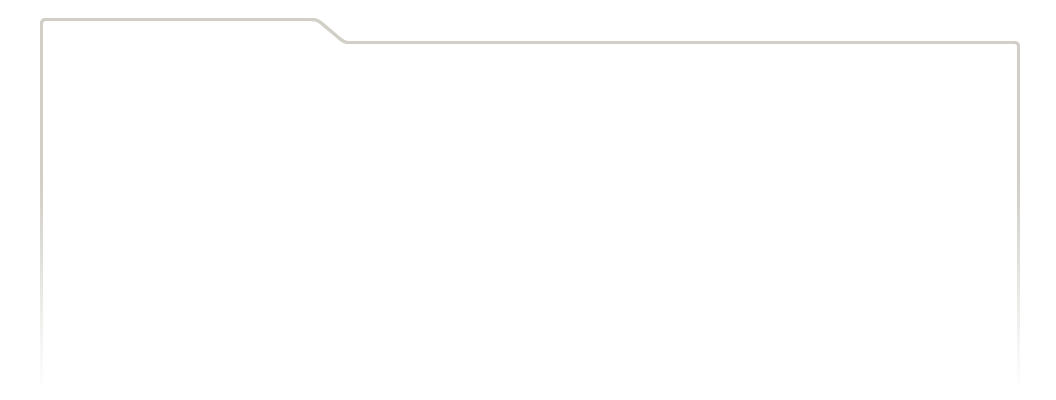
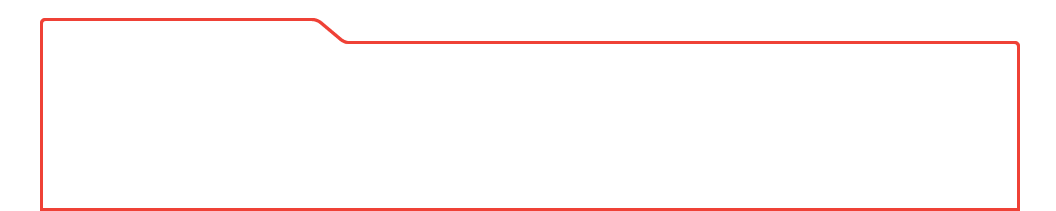
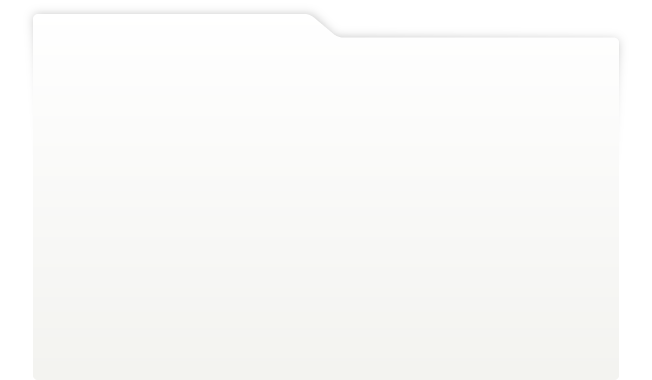
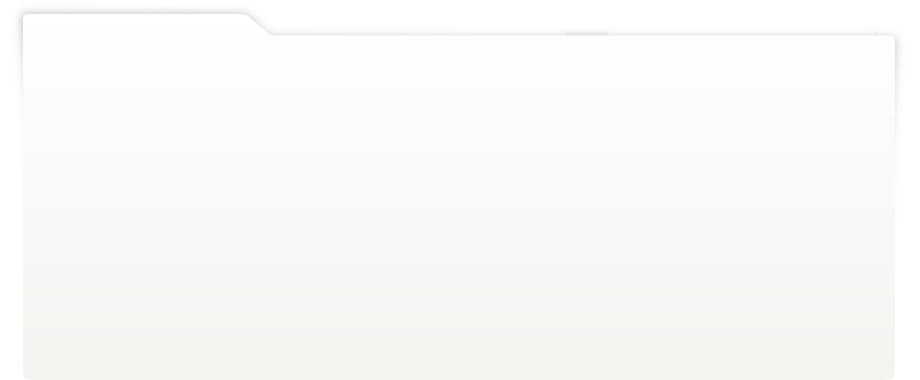
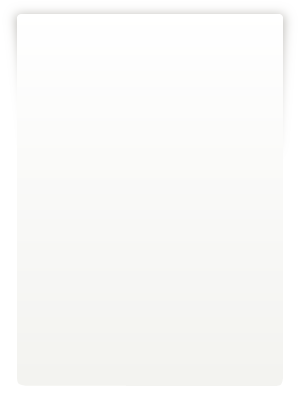
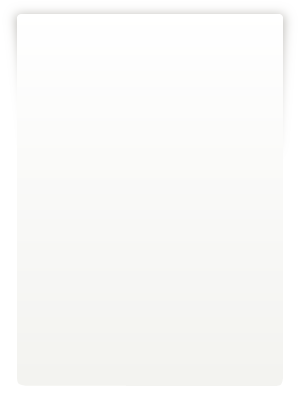
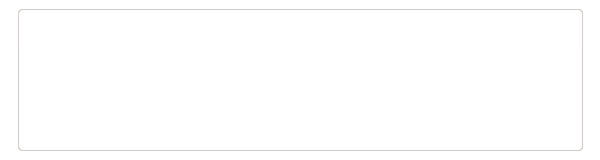
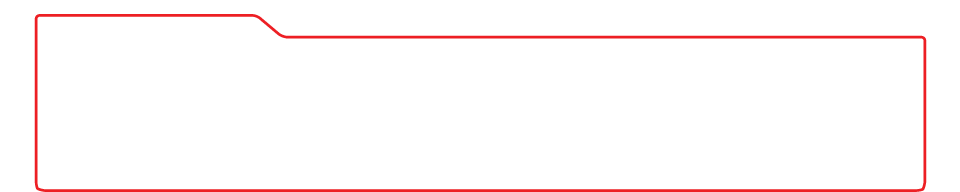
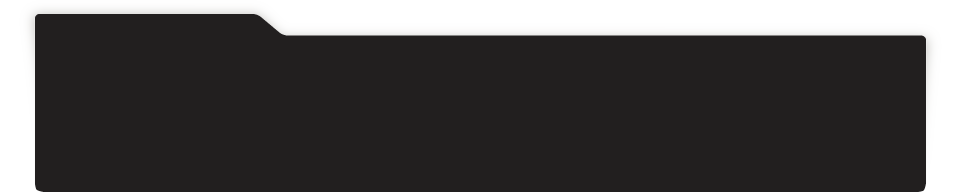
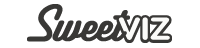
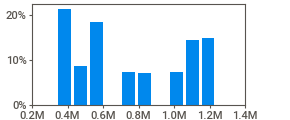
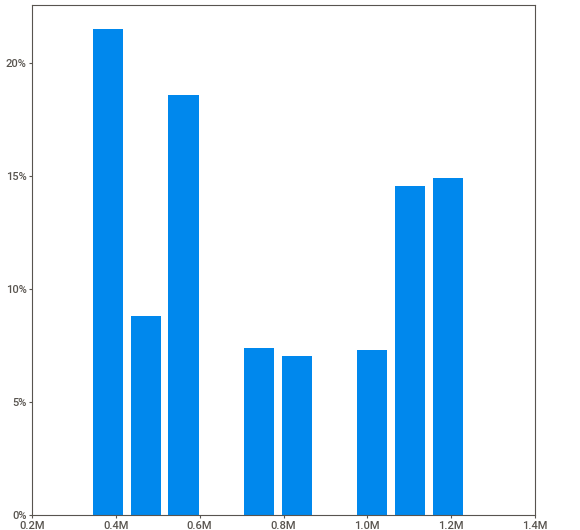
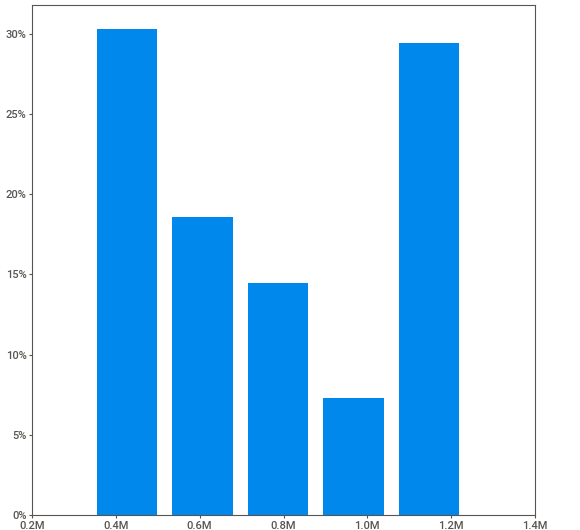
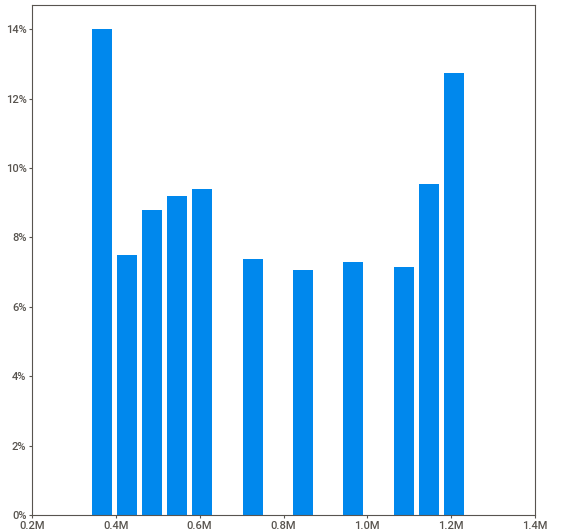
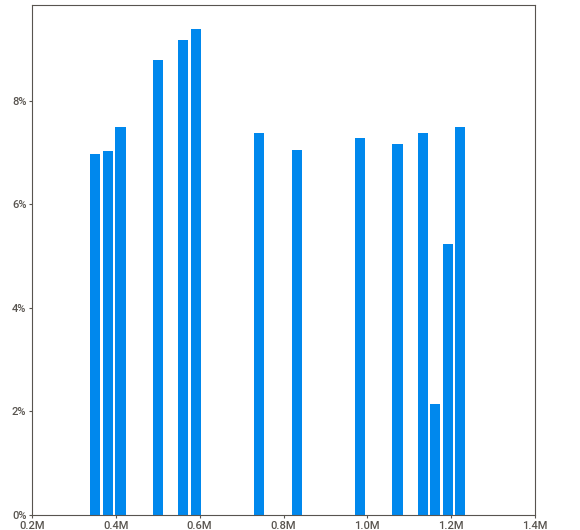
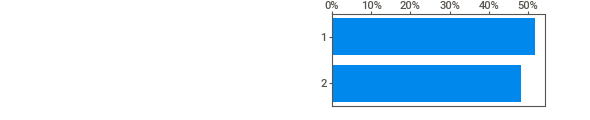
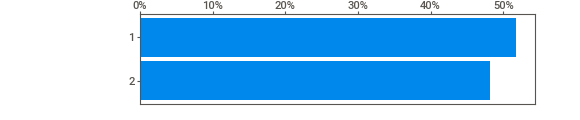
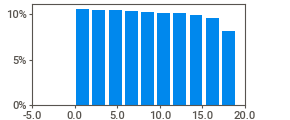
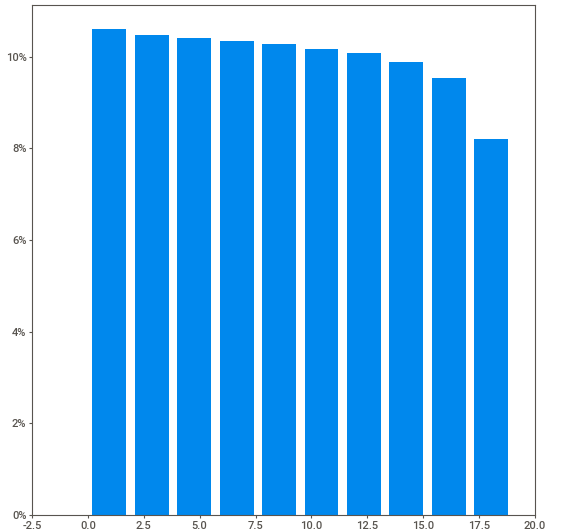
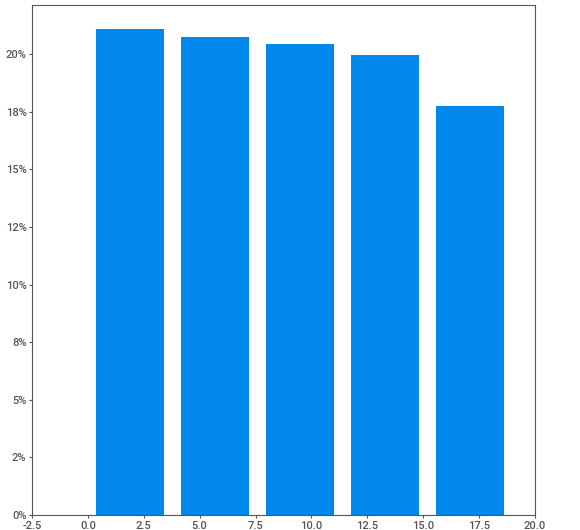
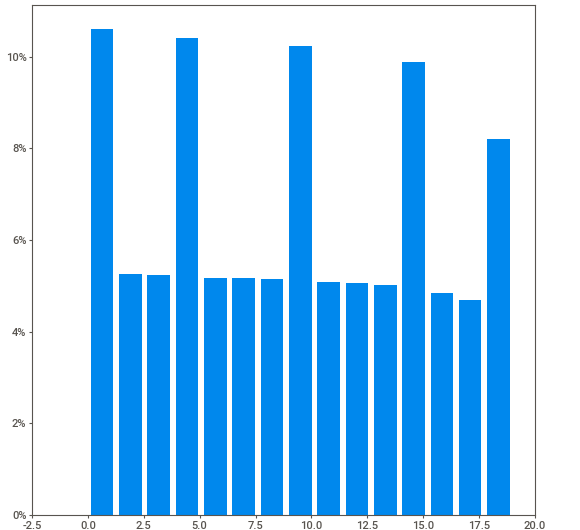
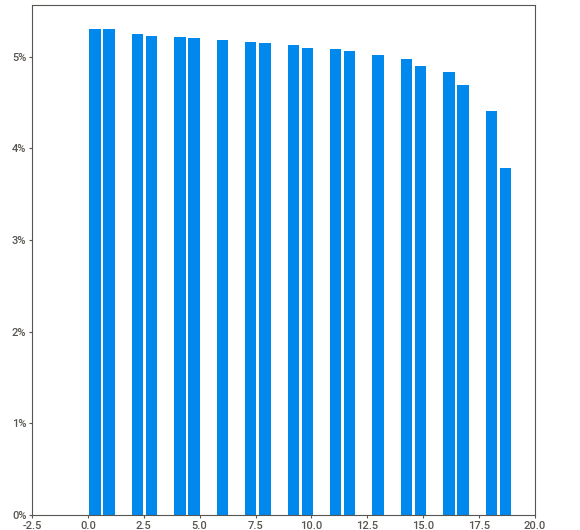
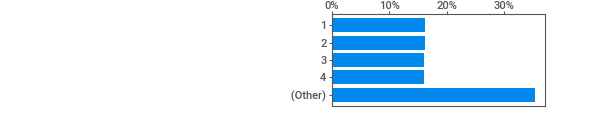
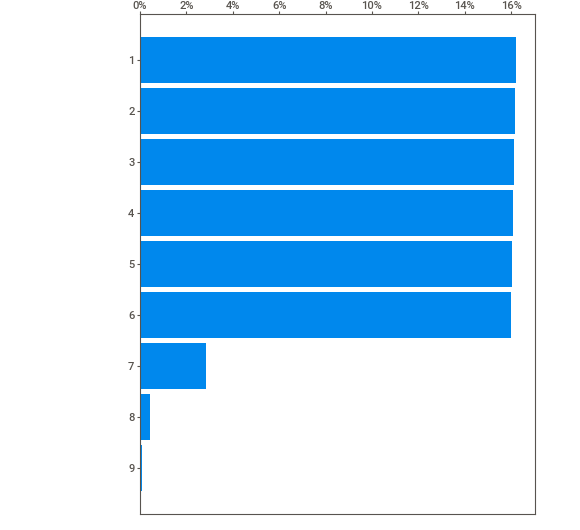
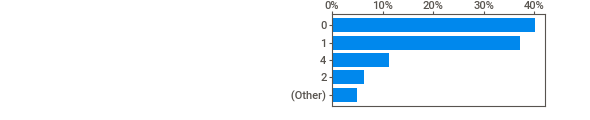
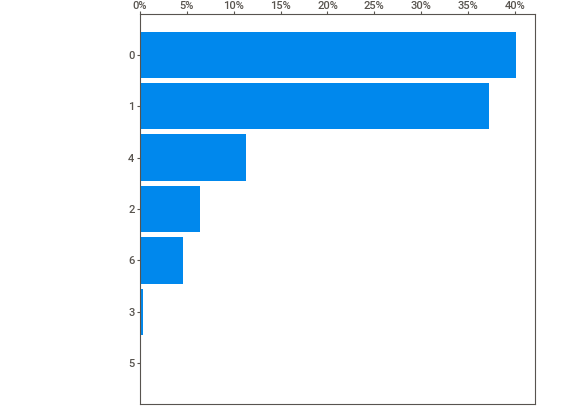
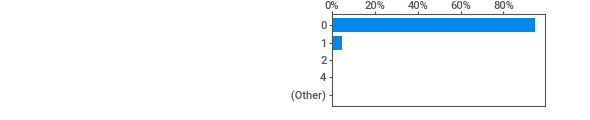
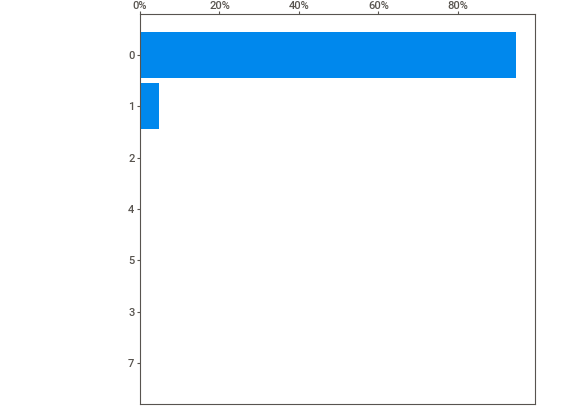
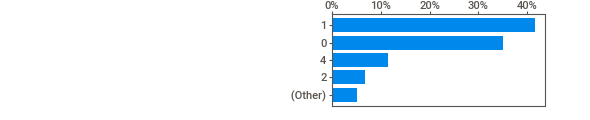
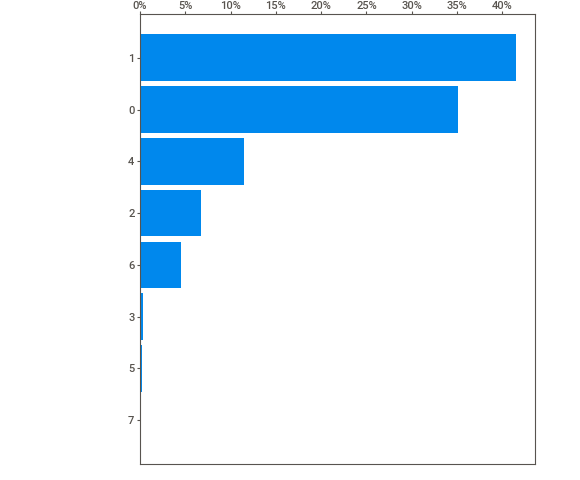
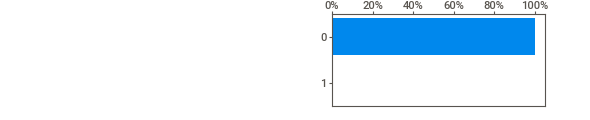
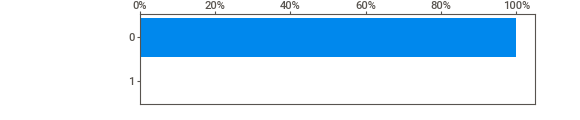
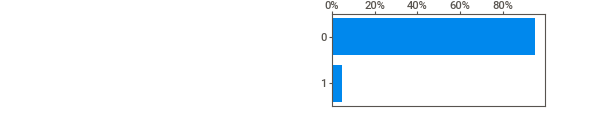
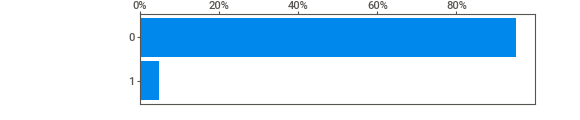
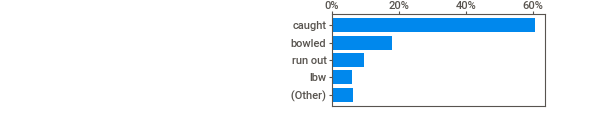
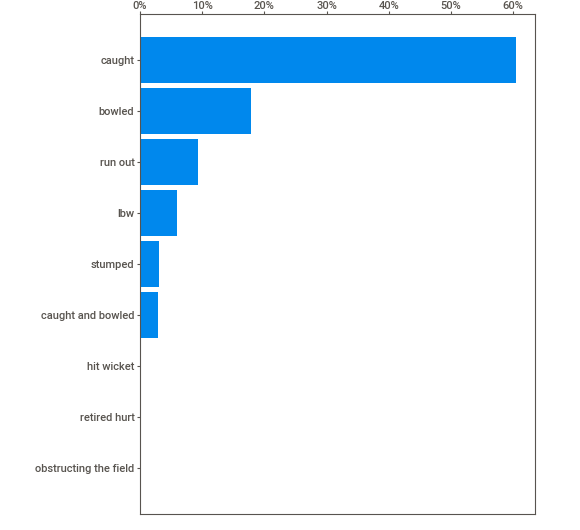
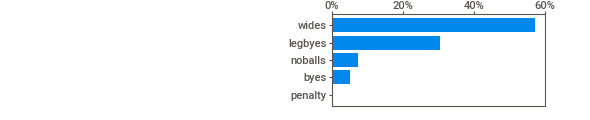
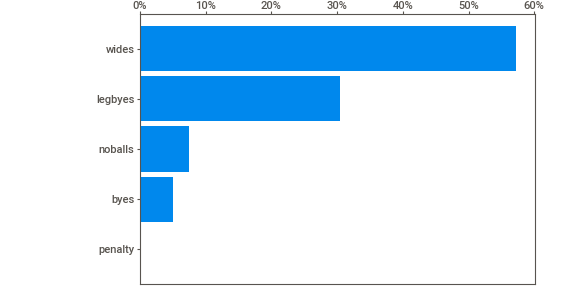
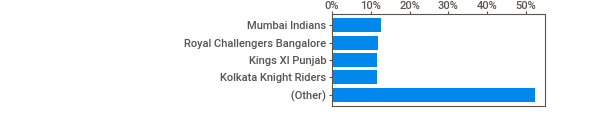
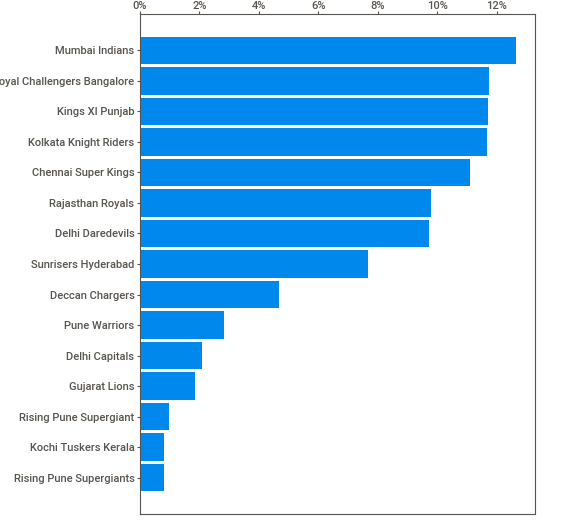
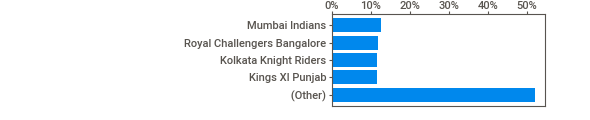
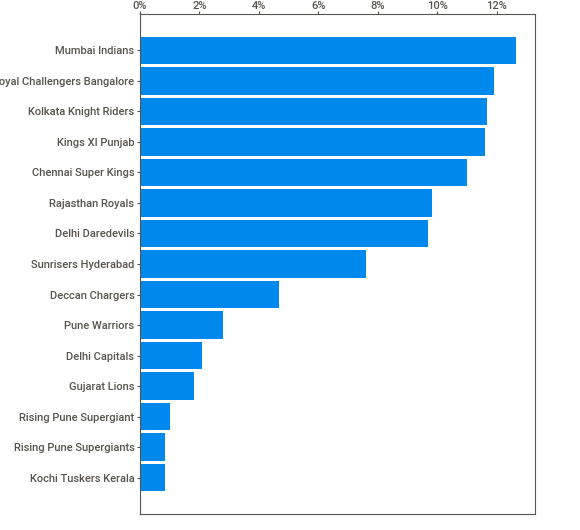
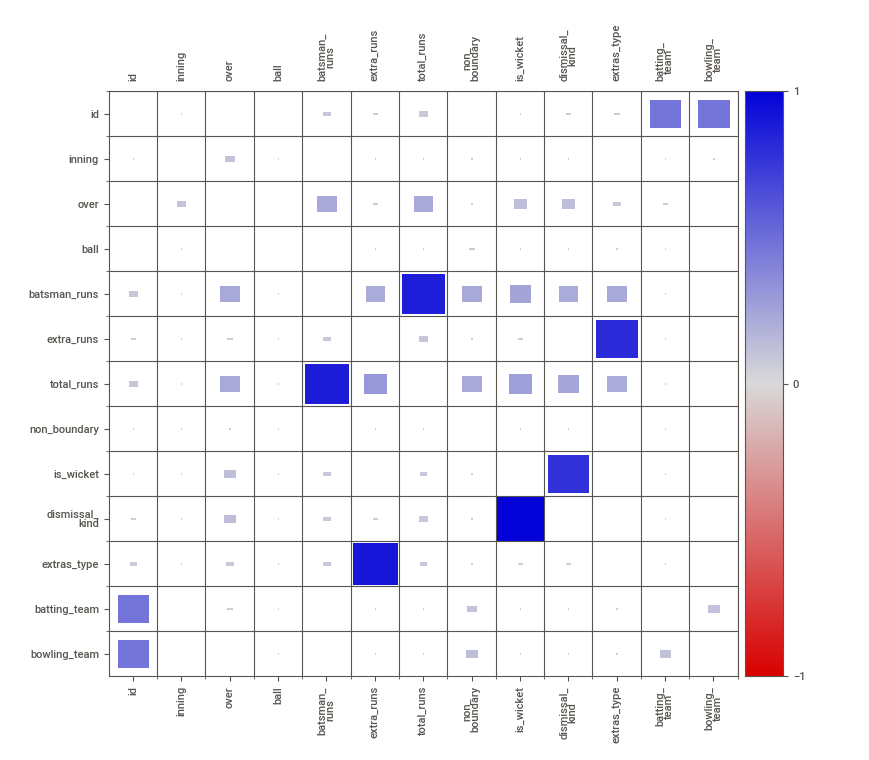
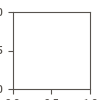

In [7]:
report=sv.analyze(ipl_data).show_notebook()

In [11]:
# Analyze the data
# Generate relevant features to represent a batsman
batsmen_data = ipl_data.groupby('batsman').agg({'id':'count', 'batsman_runs':'sum'}).reset_index()
batsmen_data.columns = ['batsman', 'matches_played', 'total_runs']
batsmen_data['strike_rate'] = (batsmen_data['total_runs'] / batsmen_data['matches_played']) * 100

In [12]:
batsmen_data

,batsman,matches_played,total_runs,strike_rate
0,A Ashish Reddy,196,280,142.857143
1,A Chandila,7,4,57.142857
2,A Chopra,75,53,70.666667
3,A Choudhary,20,25,125.000000
4,A Dananjaya,5,4,80.000000
...,...,...,...,...
532,YV Takawale,183,192,104.918033
533,Yashpal Singh,67,47,70.149254
534,Younis Khan,7,3,42.857143
535,Yuvraj Singh,2205,2750,124.716553


In [13]:
# Filter batsmen who played at least 100 matches and scored > 2500 runs
filtered_batsmen_data = batsmen_data[(batsmen_data['matches_played'] >= 100) & (batsmen_data['total_runs'] > 2500)]
filtered_batsmen_data

,batsman,matches_played,total_runs,strike_rate
24,AB de Villiers,3264,4849,148.560049
42,AM Rahane,3325,3933,118.285714
55,AT Rayudu,2970,3659,123.198653
77,BB McCullum,2267,2880,127.040141
96,CH Gayle,3342,4772,142.788749
116,DA Warner,3819,5254,137.575281
154,G Gambhir,3524,4217,119.665153
220,KA Pollard,2107,3023,143.474134
225,KD Karthik,3023,3823,126.463778
232,KL Rahul,1990,2647,133.015075


In [50]:
# Apply standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_batsmen_data[['matches_played', 'total_runs', 'strike_rate']])
scaled_data=pd.DataFrame(scaled_data,columns=['matches_played', 'total_runs', 'strike_rate'])
scaled_data

,matches_played,total_runs,strike_rate
0,0.313218,0.908111,2.001786
1,0.390156,0.022086,-1.262881
2,-0.057599,-0.242948,-0.733089
3,-0.944280,-0.996456,-0.318838
4,0.411598,0.833631,1.379431
5,1.013230,1.299858,0.817231
6,0.641151,0.296793,-1.114128
7,-1.146085,-0.858135,1.453340
8,0.009249,-0.084314,-0.380991
9,-1.293655,-1.221831,0.325476


In [66]:
#we import yellowbrick for visualuising elbow
from yellowbrick.cluster import KElbowVisualizer
#import the k means clustering model
from sklearn.cluster import KMeans

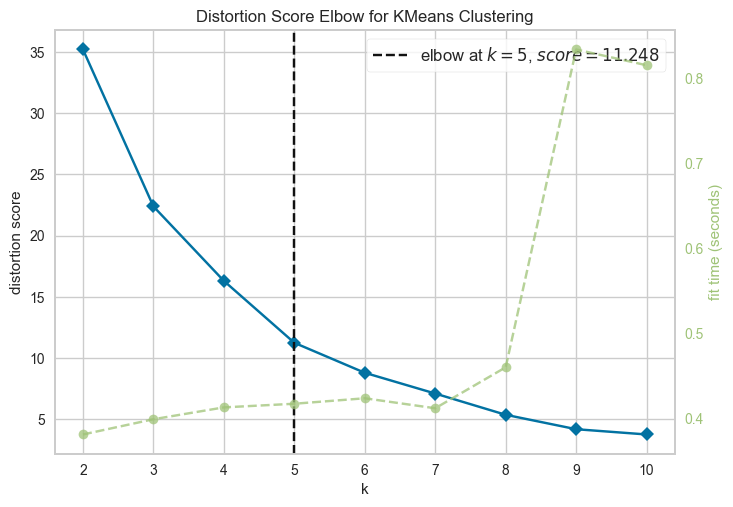

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
# initialise the k means model
Elbow = KElbowVisualizer(KMeans(), k=10)
#fit the k means model
Elbow.fit(scaled_data)
#lets show the plot
Elbow.show()

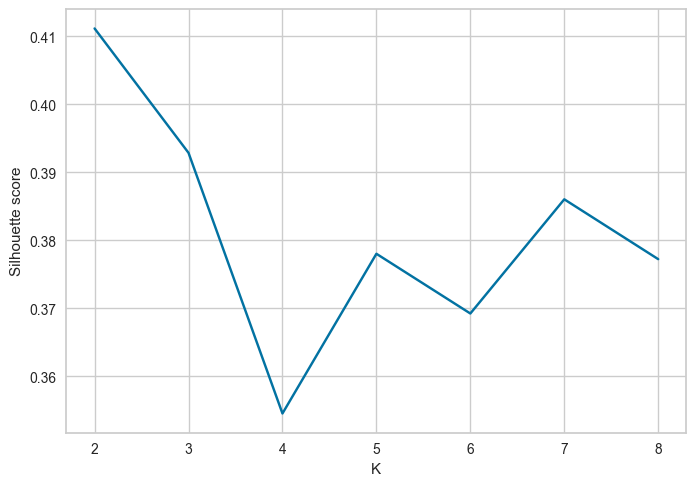

In [75]:
from sklearn.metrics import silhouette_score,silhouette_samples
clusterRange = [2, 3, 4, 5, 6, 7, 8]
avgSilhouette = []
for numClusters in clusterRange:
 
 # initialise kmeans
 kmeans= KMeans(n_clusters=numClusters)
 kmeans.fit(scaled_data)
 clusterLabels = kmeans.labels_
 avgSilhouette.append(silhouette_score(scaled_data, clusterLabels))


 # silhouette score
plt.plot(clusterRange,avgSilhouette)
plt.xlabel('K') 
plt.ylabel('Silhouette score') 
plt.show()

In [82]:
# Apply clustering algorithms
# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [59]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_data)

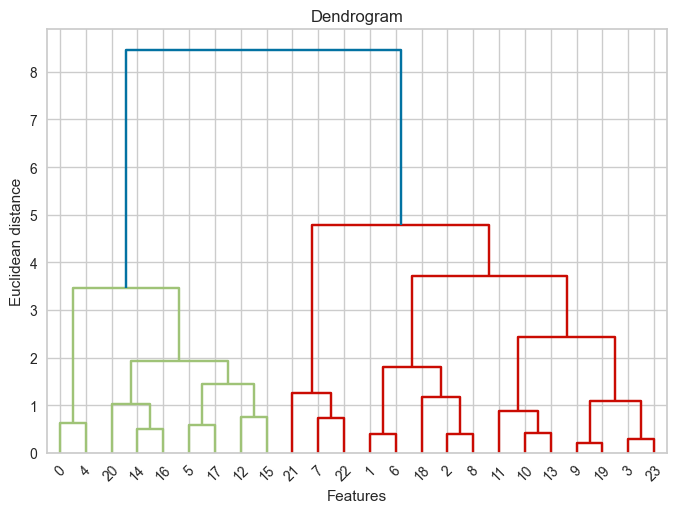

In [85]:
# import cluster hierarchy
import scipy.cluster.hierarchy as sch
#plot the dendogram
dendrogrm = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Euclidean distance')
plt.show()

In [53]:
# Hierarchical clustering (Agglomerative Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(scaled_data)

In [83]:
# Evaluate clustering results
print("\nKMeans Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))



KMeans Silhouette Score: 0.3630428614922456


In [60]:
print("DBSCAN Silhouette Score:", silhouette_score(scaled_data, dbscan_labels))

DBSCAN Silhouette Score: 0.1141135403443514


In [57]:
print("Agglomerative Clustering Silhouette Score:", silhouette_score(scaled_data, agg_labels))

Agglomerative Clustering Silhouette Score: 0.36748323748373224


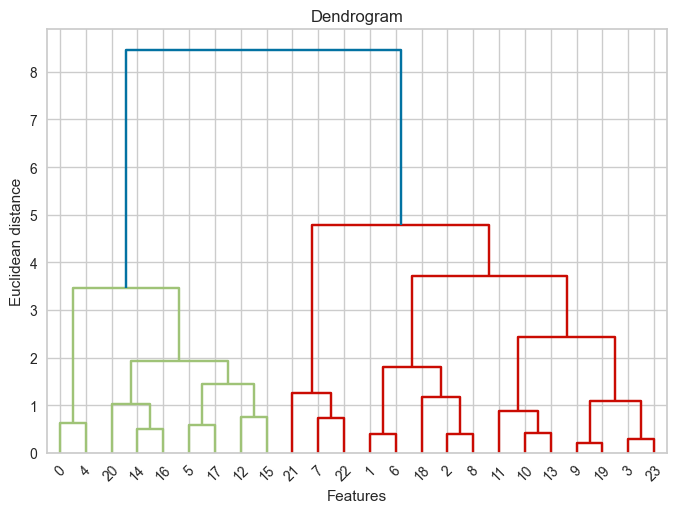

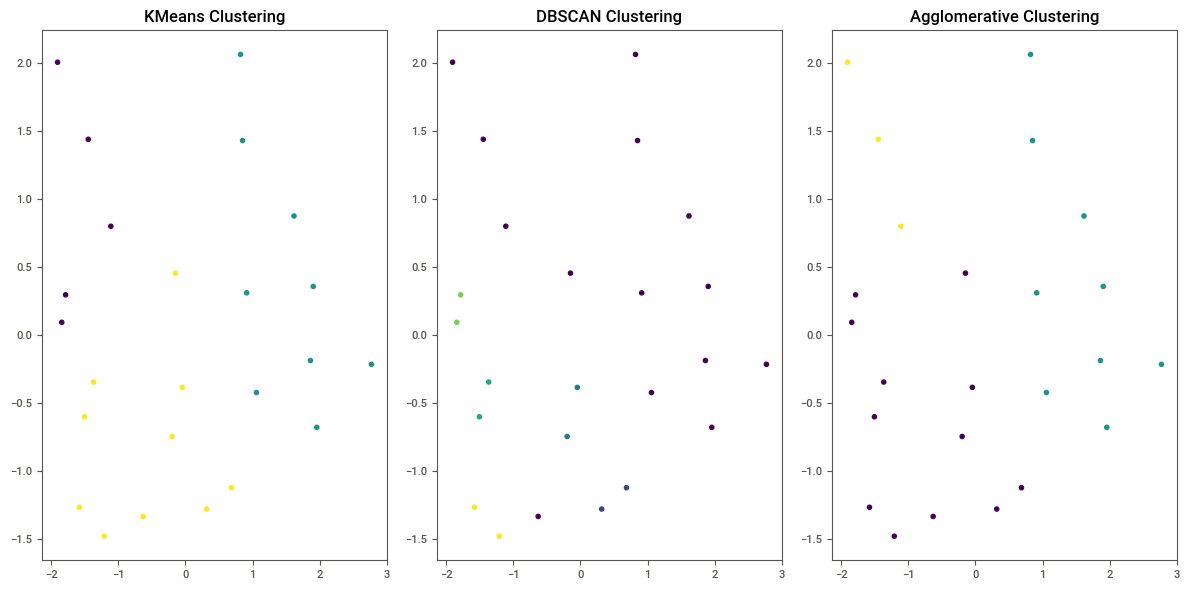

In [65]:
# Visualize the clustered dataset
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')

plt.subplot(1, 3, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

In [63]:
#we import yellowbrick for visualuising elbow
from yellowbrick.cluster import KElbowVisualizer
#import the k means clustering model
from sklearn.cluster import KMeans

,0,1
0,0.821803,2.061559
1,0.317690,-1.282631
2,-0.197272,-0.748892
3,-1.365444,-0.348374
4,0.851625,1.427924
5,1.618206,0.873173
6,0.686272,-1.125658
7,-1.446933,1.437426
8,-0.045171,-0.387695
9,-1.785079,0.292969
